<a href="https://colab.research.google.com/github/Chaitra-07/chai/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

To predict whether a customer buys insurance or not.



In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [0]:
df = pd.read_csv('gdrive/My Drive/Datasets/insurance_data.csv')

In [0]:
df.shape

(27, 2)

In [0]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [0]:
pd.unique(df['bought_insurance'])

array([0, 1])

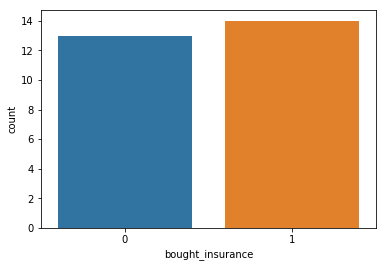

In [0]:
sb.countplot(df['bought_insurance'])

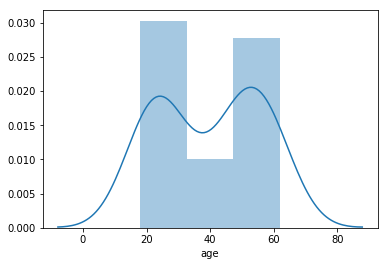

In [0]:
sb.distplot(df['age'])

In [0]:
df['age'].describe()

count    27.000000
mean     39.666667
std      15.745573
min      18.000000
25%      25.000000
50%      45.000000
75%      54.500000
max      62.000000
Name: age, dtype: float64

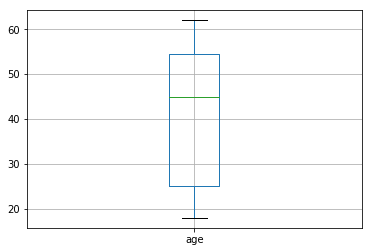

In [0]:
df.boxplot(column='age')

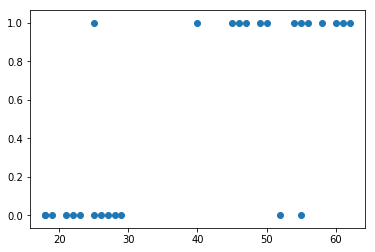

In [0]:
plt.scatter(df.age,df.bought_insurance)

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


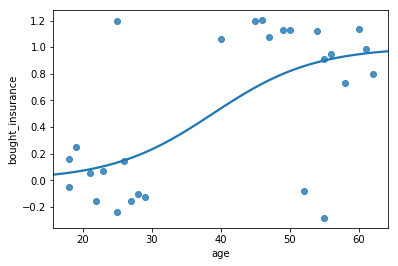

In [0]:
sb.regplot(x="age", y="bought_insurance", data=df,
               logistic=True , y_jitter=0.3)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train ,y_test = train_test_split(df[['age']],df['bought_insurance'],
                                                      test_size=0.1,random_state=66)


In [0]:
X_test

,age
1,25
26,23
4,46


In [0]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [0]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.predict(X_test)

array([0, 0, 1])

In [0]:
model.predict_proba(X_test)

array([[0.57549206, 0.42450794],
       [0.60039152, 0.39960848],
       [0.31537126, 0.68462874]])

In [0]:
model.predict([[58]])

array([1])

In [0]:
model.score(X_test,y_test)

1.0

In [0]:
model.predict([[21]])

array([0])